## Instruction
- Use this template to develop your project. Do not change the steps. 
- For each step, you may add additional cells if needed.
- Describe the steps in the "Description:" field.

## Group Information

Group No: Cancer_2

- Member 1: Foo Ling Zhen
- Member 2: Dean Lau Sheng Ting
- Member 3: Looi Wei En
- Member 4: Eason Peng 


## Import libraries

In [434]:
%config Completer.use_jedi=False

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.utils import resample, shuffle
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics


## Load the dataset

In [435]:
df= pd.read_csv('risk_factors.csv')
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [436]:
print(f"Dataframe (source) shape: {df.shape} \n\n")

df.info()

Dataframe (source) shape: (858, 36) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs               

In [437]:
# Chek for any null values (Info: This dataset used '?' to represent missing values)
df.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


The dataframe has 858 entries and 36 columns, consisting of datatypes int64 and object. There no null values detected in the dataframe.

Out of 4 target columns - Hinselmann, Schiller, Cytology and Biopsy, the target 

In [438]:
# Delete duplicate rows
duplicates = df.duplicated()
print(f'There are {duplicates.sum()} duplicate rows in the dataset.')
print(df[duplicates])
df = df.drop_duplicates()


There are 23 duplicate rows in the dataset.
     Age Number of sexual partners First sexual intercourse   
66    34                       3.0                     19.0  \
234   25                         ?                     18.0   
255   25                       2.0                     18.0   
356   18                       1.0                     17.0   
395   18                       1.0                     18.0   
406   17                       1.0                     17.0   
419   19                       4.0                     14.0   
431   18                       1.0                     14.0   
435   17                       2.0                     15.0   
440   15                       1.0                     14.0   
442   16                       1.0                     15.0   
453   15                       1.0                     15.0   
454   15                       1.0                     14.0   
466   15                       1.0                     14.0   
486   28   

In [439]:
# Assigning features to X
X = df.drop('Biopsy', axis = 1)
X.info()

# Shape of X
print("\nX shape:",X.shape) 

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, 0 to 857
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 835 non-null    int64 
 1   Number of sexual partners           835 non-null    object
 2   First sexual intercourse            835 non-null    object
 3   Num of pregnancies                  835 non-null    object
 4   Smokes                              835 non-null    object
 5   Smokes (years)                      835 non-null    object
 6   Smokes (packs/year)                 835 non-null    object
 7   Hormonal Contraceptives             835 non-null    object
 8   Hormonal Contraceptives (years)     835 non-null    object
 9   IUD                                 835 non-null    object
 10  IUD (years)                         835 non-null    object
 11  STDs                                835 non-null    object
 12 

In [440]:
# Assigning column 'Biopsy' as the target, y
y = df['Biopsy']
y.info()
print("\ny shape:",y.shape)

<class 'pandas.core.series.Series'>
Index: 835 entries, 0 to 857
Series name: Biopsy
Non-Null Count  Dtype
--------------  -----
835 non-null    int64
dtypes: int64(1)
memory usage: 13.0 KB

y shape: (835,)


In [441]:
y.shape
freq = y.value_counts()
print(freq)

Biopsy
0    781
1     54
Name: count, dtype: int64


## Split the dataset
Split the dataset into training, validation and test sets.

In [442]:
## Splitting the data into train, test and validation sets in 80:10:10

# X and y split into train, test in 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0, stratify=y)

# X_train and y_train split into train and vald in 50:50
X_test, X_vald, y_test, y_vald = train_test_split(X_test, y_test, test_size = 0.5,random_state=0, stratify=y_test)


In [443]:
# Shape of X train, validation and test
print("X_train shape:",X_train.shape)
print("X_vald shape :",X_vald.shape)
print("X_test shape :",X_test.shape)

X_train shape: (668, 35)
X_vald shape : (84, 35)
X_test shape : (83, 35)


In [444]:
# Shape of y train, validation and test
print("y_train shape:", y_train.shape)
print("y_vald shape :", y_vald.shape)
print("y_test shape :", y_test.shape)

y_train shape: (668,)
y_vald shape : (84,)
y_test shape : (83,)


In [445]:
print(X_train.shape)
print(X_vald.shape)
print(X_test.shape)

(668, 35)
(84, 35)
(83, 35)


In [446]:
print(y_train.shape)
print(y_vald.shape)
print(y_test.shape)

(668,)
(84,)
(83,)


## Data preprocessing
Perform data preprocessing such as normalization, standardization, label encoding etc.
______________________________________________________________________________________
Description:
In this data preprocessing operation, we perform the following in order:
1. Missing Value Detection and Replacement
2. Outlier Detection
3. Deal with Imbalanced Data
4. Data Normalization
5. Data Standardization

We will perform the modelling on 2 sets of data later on, which are on the imbalanced data and balanced data to find out the relationship of balancing data with the types of machine learning model used and the performance of the model.

At the end of this Data Preprocessing Section,

Preprocessed imbalanced training set will be represented by:
- X_train_std
- y_train_std

Preprocessed Balanced/Upsampled training set will be represented by:
- X_train_std_balanced
- y_train_balanced

Preprocessed validation set will be represented by:
- X_vald_std
- y_vald

Preprocessed test set will be represented by:
- X_test_std
- y_test


### Missing Value Detection and Replacement

In [447]:
# Show the datatypes of each column
print(X_train.dtypes)

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [448]:
# If the column is an object, show the unique values
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        print( col, X_train[col].unique())
        if X_train[col].str.contains('\?').any():
            print("Found missing values, '?'\n")
        else:
            print("No missing values found")

        

Number of sexual partners ['2.0' '4.0' '1.0' '3.0' '?' '5.0' '7.0' '28.0' '6.0' '15.0' '8.0' '9.0']
Found missing values, '?'

First sexual intercourse ['18.0' '16.0' '17.0' '15.0' '19.0' '14.0' '20.0' '?' '13.0' '29.0' '28.0'
 '23.0' '27.0' '10.0' '21.0' '24.0' '12.0' '26.0' '22.0' '25.0']
Found missing values, '?'

Num of pregnancies ['2.0' '3.0' '10.0' '1.0' '?' '0.0' '4.0' '5.0' '8.0' '6.0' '7.0']
Found missing values, '?'

Smokes ['0.0' '1.0' '?']
Found missing values, '?'

Smokes (years) ['0.0' '1.266972909' '8.0' '3.0' '2.0' '4.0' '9.0' '5.0' '?' '7.0' '32.0'
 '1.0' '16.0' '11.0' '13.0' '14.0' '28.0' '15.0' '22.0' '10.0' '19.0'
 '0.16' '0.5' '18.0' '12.0' '6.0' '21.0' '20.0' '37.0']
Found missing values, '?'

Smokes (packs/year) ['0.0' '0.5132021277' '2.0' '1.2' '0.05' '0.003' '4.5' '1.25' '2.25' '?'
 '5.0' '1.4' '2.4' '3.0' '1.35' '0.75' '8.0' '1.3' '0.1' '1.6' '0.16'
 '7.0' '0.4' '3.5' '0.04' '0.45' '0.15' '2.8' '1.0' '0.32' '0.9' '22.0'
 '2.6' '19.0' '0.001' '2.7' '0.8' '3.3'

In [449]:
# Show the columns where datatype = 'object'
X_train.select_dtypes(include='object').head(10)

,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),...,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Time since first diagnosis,STDs: Time since last diagnosis
250,2.0,18.0,2.0,0.0,0.0,0.0,1.0,0.25,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
529,4.0,18.0,3.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
97,1.0,18.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
682,1.0,16.0,10.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
230,2.0,17.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
820,2.0,18.0,?,0.0,0.0,0.0,1.0,0.66,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
714,2.0,17.0,2.0,0.0,0.0,0.0,1.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
716,3.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
823,3.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
576,3.0,14.0,2.0,0.0,0.0,0.0,?,?,?,?,...,?,?,?,?,?,?,?,?,?,?


We can observe that 26 columns have datatype 'object' although they consist mostly of floating point numbers. We can also see that some fields are filled with '?'. Thus, we can infer that the character '?' contributed to the heterogeneous data that resulted in the datatype 'object', and that '?' is used to represent missing values.

In [450]:
# Count the number of missing values in the columns
X_train[X_train == '?'].count()

Age                                     0
Number of sexual partners              21
First sexual intercourse                6
Num of pregnancies                     43
Smokes                                  8
Smokes (years)                          8
Smokes (packs/year)                     8
Hormonal Contraceptives                80
Hormonal Contraceptives (years)        80
IUD                                    88
IUD (years)                            88
STDs                                   79
STDs (number)                          79
STDs:condylomatosis                    79
STDs:cervical condylomatosis           79
STDs:vaginal condylomatosis            79
STDs:vulvo-perineal condylomatosis     79
STDs:syphilis                          79
STDs:pelvic inflammatory disease       79
STDs:genital herpes                    79
STDs:molluscum contagiosum             79
STDs:AIDS                              79
STDs:HIV                               79
STDs:Hepatitis B                  

In [451]:
# Replace '?' in the columns with nan
X_train_nan = X_train.copy()
X_train_nan.replace('?', np.nan, inplace=True)

# Create an instance of SimpleImputer with mean as the strategy
mean_imputer = SimpleImputer(strategy='mean')

# Fill in the nan values with the mean of their column values
X_train_imputed = pd.DataFrame(mean_imputer.fit_transform(X_train_nan), columns=X_train.columns)


In [452]:
# Check for null values
X_train_imputed.isna().all()

Age                                   False
Number of sexual partners             False
First sexual intercourse              False
Num of pregnancies                    False
Smokes                                False
Smokes (years)                        False
Smokes (packs/year)                   False
Hormonal Contraceptives               False
Hormonal Contraceptives (years)       False
IUD                                   False
IUD (years)                           False
STDs                                  False
STDs (number)                         False
STDs:condylomatosis                   False
STDs:cervical condylomatosis          False
STDs:vaginal condylomatosis           False
STDs:vulvo-perineal condylomatosis    False
STDs:syphilis                         False
STDs:pelvic inflammatory disease      False
STDs:genital herpes                   False
STDs:molluscum contagiosum            False
STDs:AIDS                             False
STDs:HIV                        

In [453]:
# Check if any '?' remains in the columns
X_train_imputed[X_train_imputed=='?'].count()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [454]:
# Check if columns still consist of datatype = 'object'
X_train_imputed.dtypes

Age                                   float64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [455]:
X_train_imputed


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,25.0,2.0,18.0,2.0,0.0,0.0,0.0,1.000000,0.25000,0.000000,...,0.0,6.160714,5.803571,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,33.0,4.0,18.0,3.0,0.0,0.0,0.0,1.000000,5.00000,0.000000,...,0.0,6.160714,5.803571,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35.0,1.0,18.0,2.0,0.0,0.0,0.0,1.000000,2.00000,0.000000,...,0.0,6.160714,5.803571,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,70.0,1.0,16.0,10.0,0.0,0.0,0.0,0.000000,0.00000,1.000000,...,0.0,6.160714,5.803571,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23.0,2.0,17.0,1.0,0.0,0.0,0.0,1.000000,1.00000,0.000000,...,0.0,6.160714,5.803571,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,30.0,1.0,22.0,2.0,0.0,0.0,0.0,1.000000,0.16000,0.000000,...,0.0,6.160714,5.803571,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664,35.0,3.0,16.0,3.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,...,0.0,6.160714,5.803571,0.0,0.0,0.0,0.0,0.0,0.0,0.0
665,28.0,2.0,18.0,6.0,0.0,0.0,0.0,1.000000,7.00000,0.000000,...,0.0,6.160714,5.803571,0.0,0.0,0.0,0.0,0.0,0.0,0.0
666,35.0,5.0,23.0,2.0,0.0,0.0,0.0,1.000000,0.33000,0.000000,...,0.0,6.160714,5.803571,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Repeat the steps separately for validation set and test set.

In [456]:
### Validation set

# Replace '?' in the columns with nan
X_vald_nan = X_vald.copy()
X_vald_nan.replace('?', np.nan, inplace=True)

# Fill in the nan values with the mean of their column values
X_vald_imputed = pd.DataFrame(mean_imputer.fit_transform(X_vald_nan), columns=X_vald.columns)

# Check for null values
print(X_vald_imputed.isna().all())

Age                                   False
Number of sexual partners             False
First sexual intercourse              False
Num of pregnancies                    False
Smokes                                False
Smokes (years)                        False
Smokes (packs/year)                   False
Hormonal Contraceptives               False
Hormonal Contraceptives (years)       False
IUD                                   False
IUD (years)                           False
STDs                                  False
STDs (number)                         False
STDs:condylomatosis                   False
STDs:cervical condylomatosis          False
STDs:vaginal condylomatosis           False
STDs:vulvo-perineal condylomatosis    False
STDs:syphilis                         False
STDs:pelvic inflammatory disease      False
STDs:genital herpes                   False
STDs:molluscum contagiosum            False
STDs:AIDS                             False
STDs:HIV                        

In [457]:
### Validation Set

# Check if any '?' remains in the columns
print(X_vald_imputed[X_vald_imputed=='?'].count())

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [458]:
### Test set

# Replace '?' in the columns with nan
X_test_nan = X_test.copy()
X_test_nan.replace('?', np.nan, inplace=True)

# Fill in the nan values with the mean of their column values
X_test_imputed = pd.DataFrame(mean_imputer.fit_transform(X_test_nan), columns=X_vald.columns)

# Check for null values
X_test_imputed.isna().all()

Age                                   False
Number of sexual partners             False
First sexual intercourse              False
Num of pregnancies                    False
Smokes                                False
Smokes (years)                        False
Smokes (packs/year)                   False
Hormonal Contraceptives               False
Hormonal Contraceptives (years)       False
IUD                                   False
IUD (years)                           False
STDs                                  False
STDs (number)                         False
STDs:condylomatosis                   False
STDs:cervical condylomatosis          False
STDs:vaginal condylomatosis           False
STDs:vulvo-perineal condylomatosis    False
STDs:syphilis                         False
STDs:pelvic inflammatory disease      False
STDs:genital herpes                   False
STDs:molluscum contagiosum            False
STDs:AIDS                             False
STDs:HIV                        

In [459]:
### Test Set

# Check if any '?' remains in the columns
print(X_test_imputed[X_test_imputed=='?'].count())

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


### Outlier Detection


In [460]:
# Function to calculate the threshold to determine the outliers

def Outlier_Threshold(df, column):
    """
    Calculates the outlier threshold for a given column in a DataFrame.

    Parameters:
    df (DataFrame): The input DataFrame containing the data.
    column (int): The index of the column for which to calculate the outlier threshold.

    Returns:
    None

    The function calculates the outlier threshold using the Interquartile Range (IQR) method.
    It determines the 75th percentile (Q3) and the 25th percentile (Q1) of the values in the column.
    Then, it calculates the IQR by subtracting Q1 from Q3.
    Finally, the function computes the outlier threshold as Q3 plus 1.5 times the IQR.
    The result is printed for the specified column in the DataFrame.
    
    """
    for num in column:
        Q3 = np.quantile(df.iloc[:,num:(num+1)],.75)
        Q1 = np.quantile(df.iloc[:,num:(num+1)],.25)
        IQR = Q3 - Q1
        outlier_threshold = Q3+(1.5*IQR)
        print(df.columns[num],": ",outlier_threshold)    

In [461]:
# Function to identify the columns with outliers in a given dataframe

def Outliers(df,outliers,std_dev_threshold, max_mean_ratio_threshold):
    """
    Identifies the columns with outliers of a DataFrame based on specified thresholds.

    Parameters:
    df (DataFrame): The input DataFrame containing the data.
    outliers (list): A list to store the indices of the detected outliers.
    std_dev_threshold (float): The threshold for standard deviation to determine outliers.
    max_mean_ratio_threshold (float): The threshold for the maximum-mean ratio to determine outliers.

    Returns:
    None

    The function iterates over the columns of the DataFrame and calculates the standard deviation (std_dev) and the maximum-mean ratio (max_mean_ratio) for each column.
    If the std_dev of a column exceeds the specified std_dev_threshold or the max_mean_ratio exceeds the specified max_mean_ratio_threshold, the column index is appended to the outliers list.
    The function prints the column name, its standard deviation, and the max-mean ratio if it is identified as an outlier.
    """
    for col in df.columns:
        col_index = df.columns.get_loc(col)
        std_dev = df[col].std()
        if(df[col].mean()!=0 and df[col].max()!=1):
            max_mean_ratio = float(df[col].max()/df[col].mean())
        else:
            continue
        if (std_dev>std_dev_threshold or max_mean_ratio>max_mean_ratio_threshold):
            outliers.append(col_index)
            print(col,"Standard Deviation: ",std_dev)
            print(col,"Max Mean Ratio: ",max_mean_ratio,"\n")

#### Training set

After imputating the missing values, we can show the full proper description of the cancer dataset

In [462]:
X_train_imputed.iloc[:,0:18].describe(include = 'all')

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis
count,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.0,668.000000,668.000000,668.000000
mean,26.89521,2.564142,16.995468,2.288000,0.148485,1.186209,0.473703,0.651361,2.318630,0.117241,0.522948,0.106961,0.178268,0.057725,0.0,0.005093,0.056027,0.028862
std,8.00587,1.727756,2.727776,1.385381,0.353709,3.973737,2.346825,0.447430,3.621247,0.299994,1.760054,0.290431,0.528472,0.219162,0.0,0.066894,0.216109,0.157327
min,13.00000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,21.00000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,26.00000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,32.00000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,70.00000,28.000000,29.000000,10.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [463]:
X_train_imputed.iloc[:,18:].describe(include = 'all')

,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,668.000000,668.000000,668.000000,668.0,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.001698,0.001698,0.001698,0.0,0.020374,0.001698,0.003396,0.088323,6.160714,5.803571,0.025449,0.005988,0.025449,0.025449,0.038922,0.088323,0.053892
std,0.038687,0.038687,0.038687,0.0,0.132757,0.038687,0.054666,0.304363,1.779255,1.724173,0.157603,0.077208,0.157603,0.157603,0.193554,0.283977,0.225974
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6.160714,5.803571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6.160714,5.803571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,6.160714,5.803571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can hypothesize that there are outliers present in some numerical columns by monitoring the standard deviation and difference between the max value and the mean value. The columns with outliers are identified by those whose standard deviation has a threshold of more than 3, or if the ratio of the max value over the mean value is more than 3 for numerical columns.

In [464]:
# Identify the columns with outliers 
# Stnadard deviation threshold = 3
# Max Mean Ratio threshold = 3
column_train = []
Outliers(X_train_imputed, column_train, std_dev_threshold = 3, max_mean_ratio_threshold = 3)
print("Columns with outliers (index): ",column_train)


Age Standard Deviation:  8.00586972358235
Age Max Mean Ratio:  2.60269397751308 

Number of sexual partners Standard Deviation:  1.7277556478240295
Number of sexual partners Max Mean Ratio:  10.919831223628691 

Num of pregnancies Standard Deviation:  1.3853809439356706
Num of pregnancies Max Mean Ratio:  4.370629370629371 

Smokes (years) Standard Deviation:  3.9737366543731154
Smokes (years) Max Mean Ratio:  31.191817874417275 

Smokes (packs/year) Standard Deviation:  2.3468249488004393
Smokes (packs/year) Max Mean Ratio:  78.10805035421467 

Hormonal Contraceptives (years) Standard Deviation:  3.621247363075826
Hormonal Contraceptives (years) Max Mean Ratio:  12.93867536314688 

IUD (years) Standard Deviation:  1.7600536904241944
IUD (years) Max Mean Ratio:  36.33246513468068 

STDs (number) Standard Deviation:  0.5284724296214639
STDs (number) Max Mean Ratio:  22.43809523809524 

STDs: Number of diagnosis Standard Deviation:  0.30436337608388814
STDs: Number of diagnosis Max Mean 

The identified columns with outliers are:

- Column[1]: Number of Sexual Partners
- Column[3]: Num of pregnancies
- Column[5]: Smokes (years)
- Column[6]: Smokes (packs/year)
- Column[8]: Hormonal Contraceptives (years)
- Column[10]: IUD (years)
- Column[12]: STDs (number)
- Column[25]: STDs: Number of diagnosis
- Column[26]: STDs: Time since first diagnosis
- Column[27]: STDs: Time since last diagnosis

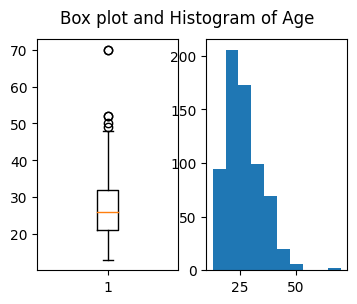

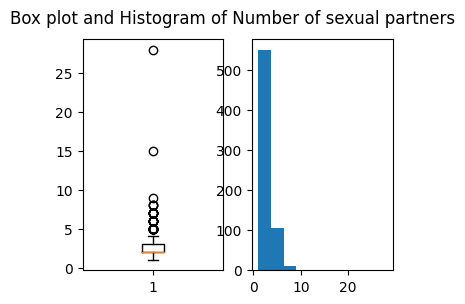

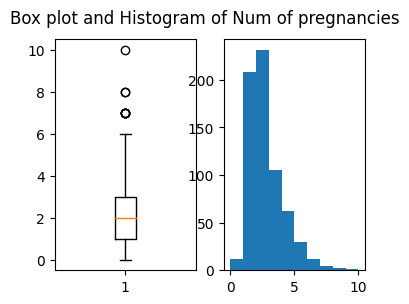

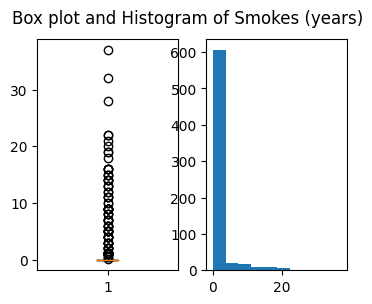

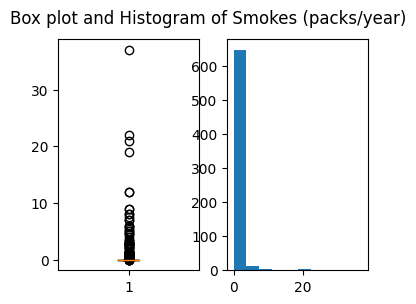

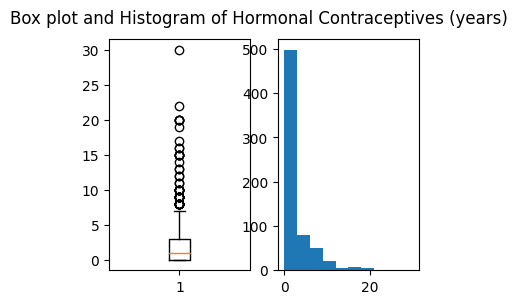

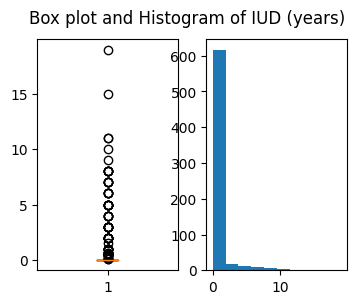

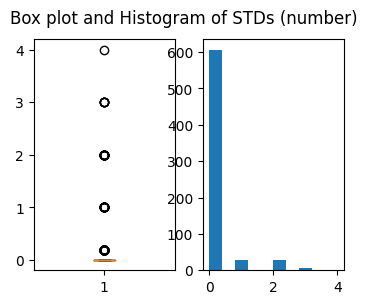

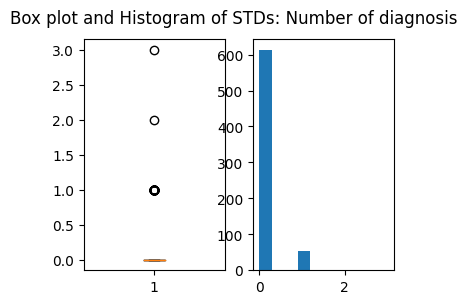

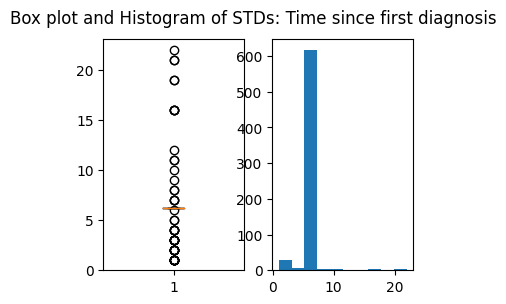

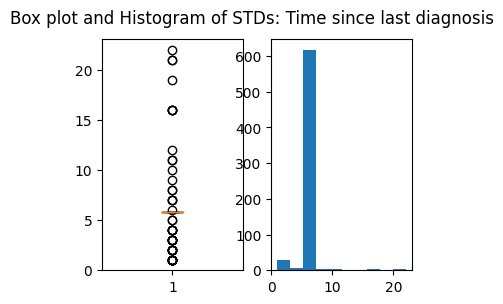

In [465]:
X_train_outlier = X_train_imputed.copy()

# Plot the distribution of the identified columns
for num in column_train:
    fig, (boxplot, hist) = plt.subplots(1, 2)
    fig.suptitle('Box plot and Histogram of '+ df.columns[num])
    boxplot.boxplot(X_train_outlier.iloc[:,num:(num+1)])  # Boxplot
    hist.hist(X_train_outlier.iloc[:,num:(num+1)])        # Histogram

In [466]:
# Calculate the threshold for outliers for the identified columns
Outlier_Threshold(X_train_outlier, column_train)

Age :  48.5
Number of sexual partners :  4.5
Num of pregnancies :  6.0
Smokes (years) :  0.0
Smokes (packs/year) :  0.0
Hormonal Contraceptives (years) :  7.5
IUD (years) :  0.0
STDs (number) :  0.0
STDs: Number of diagnosis :  0.0
STDs: Time since first diagnosis :  6.160714285714286
STDs: Time since last diagnosis :  5.803571428571429


From the data visualizations above, we can observe that all the graphs are skewed to the right where outliers are present. This justifies the former method of outlier identification.

The outlier threshold indicates the value where any field more than the threshold within that column is identified as an outlier. We can see that most of the columns identified have a threshold present. On the other hand, those columns of threshold 0 is due to the majority fields having the value '0', which resulted in a value of zero for both the first quartile and the third quartile.

Therefore, we will be applying **Square Root transformation** to make the data more normally distributed and reduce the impact of outliers.

In [467]:
# A copy of X_train_outlier where square root transformation will be applied
X_train_sqrt = X_train_outlier.copy()   

# Perform square root transformation on the columns with outliers
X_train_sqrt.iloc[:,column_train] = np.sqrt(X_train_sqrt.iloc[:,column_train])
X_train_sqrt

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,5.000000,1.414214,18.0,1.414214,0.0,0.0,0.0,1.000000,0.500000,0.000000,...,0.0,2.482079,2.40906,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.744563,2.000000,18.0,1.732051,0.0,0.0,0.0,1.000000,2.236068,0.000000,...,0.0,2.482079,2.40906,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.916080,1.000000,18.0,1.414214,0.0,0.0,0.0,1.000000,1.414214,0.000000,...,0.0,2.482079,2.40906,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.366600,1.000000,16.0,3.162278,0.0,0.0,0.0,0.000000,0.000000,1.000000,...,0.0,2.482079,2.40906,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.795832,1.414214,17.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.000000,...,0.0,2.482079,2.40906,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,5.477226,1.000000,22.0,1.414214,0.0,0.0,0.0,1.000000,0.400000,0.000000,...,0.0,2.482079,2.40906,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664,5.916080,1.732051,16.0,1.732051,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,2.482079,2.40906,0.0,0.0,0.0,0.0,0.0,0.0,0.0
665,5.291503,1.414214,18.0,2.449490,0.0,0.0,0.0,1.000000,2.645751,0.000000,...,0.0,2.482079,2.40906,0.0,0.0,0.0,0.0,0.0,0.0,0.0
666,5.916080,2.236068,23.0,1.414214,0.0,0.0,0.0,1.000000,0.574456,0.000000,...,0.0,2.482079,2.40906,0.0,0.0,0.0,0.0,0.0,0.0,0.0


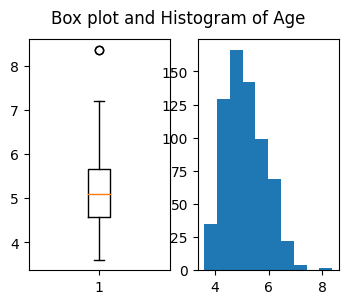

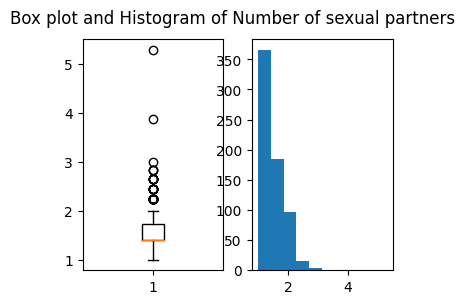

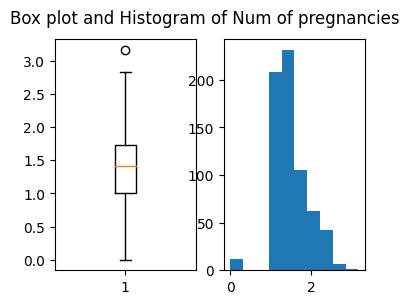

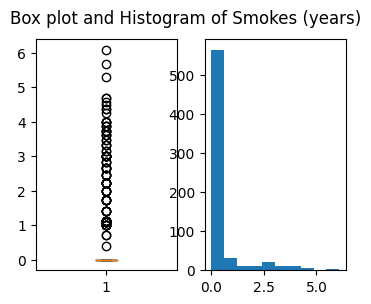

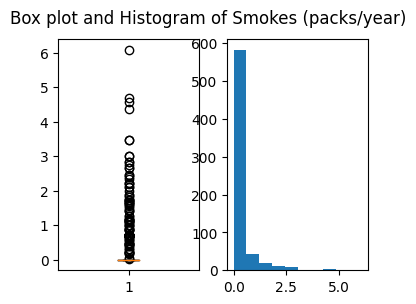

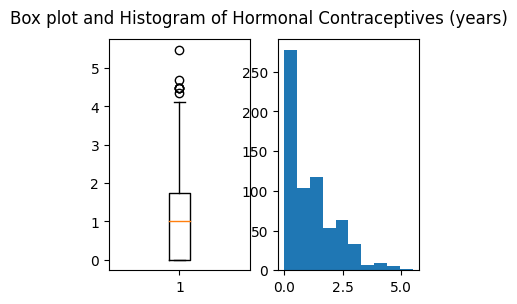

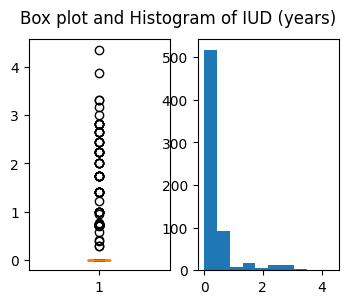

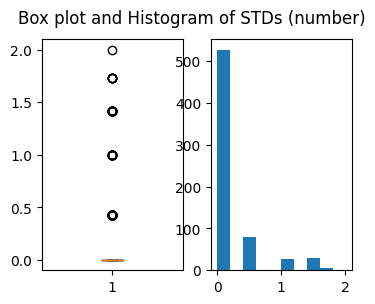

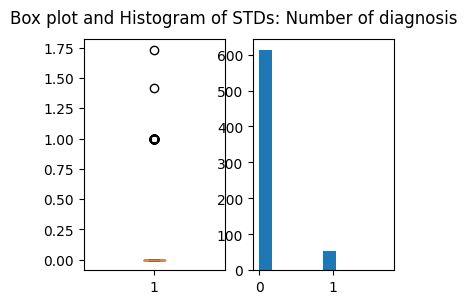

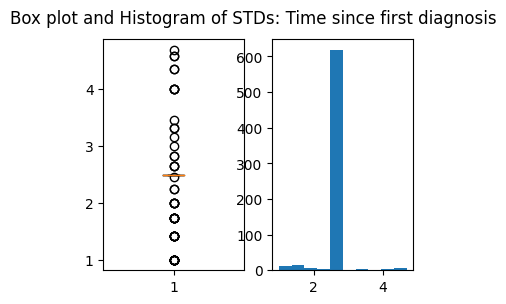

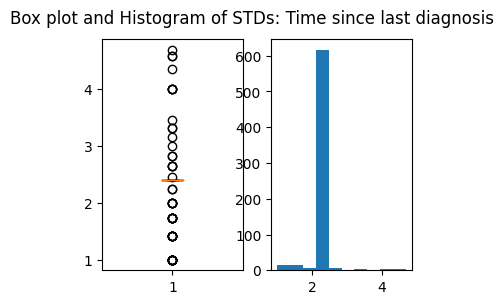

In [468]:
# Show the distribution of the columns after square root transformation
for num in column_train:
    fig, (boxplot, hist) = plt.subplots(1, 2)
    fig.suptitle('Box plot and Histogram of '+ df.columns[num])
    boxplot.boxplot(X_train_sqrt.iloc[:,num:(num+1)])  # Boxplot
    hist.hist(X_train_sqrt.iloc[:,num:(num+1)])        # Histogram


#### Validation Set
We apply the same methods to address the columns with outliers in the validation set.

In [469]:
# Define X_vald_outlier
X_vald_outlier = X_vald_imputed.copy()

# Calculate the threshold for outliers for the identified columns
Outlier_Threshold(X_train_outlier, column_train)

Age :  48.5
Number of sexual partners :  4.5
Num of pregnancies :  6.0
Smokes (years) :  0.0
Smokes (packs/year) :  0.0
Hormonal Contraceptives (years) :  7.5
IUD (years) :  0.0
STDs (number) :  0.0
STDs: Number of diagnosis :  0.0
STDs: Time since first diagnosis :  6.160714285714286
STDs: Time since last diagnosis :  5.803571428571429


In [470]:
# A copy of X_vald_sqrt where square root transformation will be applied
X_vald_sqrt = X_vald_outlier.copy()   

# Perform square root transformation on the columns with outliers
X_vald_sqrt.iloc[:,column_train] = np.sqrt(X_vald_sqrt.iloc[:,column_train])

#### Test Set
We apply the same methods to address the columns with outliers in the test set.

In [471]:
# Define X_test with outliers
X_test_outlier = X_test_imputed.copy()

In [472]:
# A copy of X_vald_sqrt where square root transformation will be applied
X_test_sqrt = X_test_outlier.copy()   

# Perform square root transformation on the columns with outliers
X_test_sqrt.iloc[:,column_train] = np.sqrt(X_test_outlier.iloc[:,column_train])

### Imbalanced Data
We found that the dataset has serious imbalanced class, thus, we have to address this problem. 

#### Training Set

Biopsy
0    625
1     43
Name: count, dtype: int64


<Axes: xlabel='Biopsy', ylabel='count'>

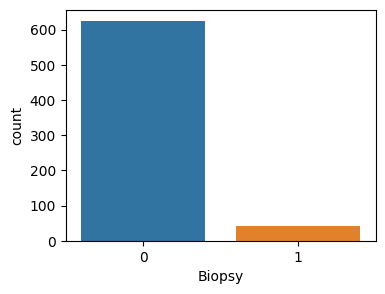

In [473]:
# Display the number of values for each class in y
print(y_train.value_counts())

## Plot bar chart to visualize the imbalance of the target column
# Plot the bar chart
sns.countplot(x = y_train)

As we observe from the numbers and graph above, we can see that there is an extreme uneven distribution of values for class 0 and 1. The majority class is 94%（642 out of 686 records) with a negative biopsy diagnosis, while the minority class is only 6% (44 out of 772 records) with a positive biopsy diagnosis. This may cause a biased prediction by our classification models.

Thus, we will deal with this imbalance by oversampling the minority class by resampling, using the resample() function from the sklearn.utils library.

In [474]:
# y_train index is in a mess after dropping the outliers
print(y_train)

# Reset index for y_train to concatenate with X_train_sqrt
y_train_reset_index = (y_train.reset_index()).drop('index', axis = 1)

print("\nAfter reset:\n", y_train_reset_index)


250    0
529    0
97     0
682    0
230    0
      ..
724    0
827    0
637    0
69     0
328    0
Name: Biopsy, Length: 668, dtype: int64

After reset:
      Biopsy
0         0
1         0
2         0
3         0
4         0
..      ...
663       0
664       0
665       0
666       0
667       0

[668 rows x 1 columns]


In [475]:
# X_train_sqrt is already in a correct index & ready to be concatenated with y_train_reset_index
X_train_sqrt

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,5.000000,1.414214,18.0,1.414214,0.0,0.0,0.0,1.000000,0.500000,0.000000,...,0.0,2.482079,2.40906,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.744563,2.000000,18.0,1.732051,0.0,0.0,0.0,1.000000,2.236068,0.000000,...,0.0,2.482079,2.40906,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.916080,1.000000,18.0,1.414214,0.0,0.0,0.0,1.000000,1.414214,0.000000,...,0.0,2.482079,2.40906,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.366600,1.000000,16.0,3.162278,0.0,0.0,0.0,0.000000,0.000000,1.000000,...,0.0,2.482079,2.40906,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.795832,1.414214,17.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.000000,...,0.0,2.482079,2.40906,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,5.477226,1.000000,22.0,1.414214,0.0,0.0,0.0,1.000000,0.400000,0.000000,...,0.0,2.482079,2.40906,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664,5.916080,1.732051,16.0,1.732051,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,2.482079,2.40906,0.0,0.0,0.0,0.0,0.0,0.0,0.0
665,5.291503,1.414214,18.0,2.449490,0.0,0.0,0.0,1.000000,2.645751,0.000000,...,0.0,2.482079,2.40906,0.0,0.0,0.0,0.0,0.0,0.0,0.0
666,5.916080,2.236068,23.0,1.414214,0.0,0.0,0.0,1.000000,0.574456,0.000000,...,0.0,2.482079,2.40906,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [476]:
# Combining X_train and y_vald into a dataframe for easy operation
train = pd.concat([X_train_sqrt, y_train_reset_index], axis = 1)
train

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,5.000000,1.414214,18.0,1.414214,0.0,0.0,0.0,1.000000,0.500000,0.000000,...,2.482079,2.40906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,5.744563,2.000000,18.0,1.732051,0.0,0.0,0.0,1.000000,2.236068,0.000000,...,2.482079,2.40906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,5.916080,1.000000,18.0,1.414214,0.0,0.0,0.0,1.000000,1.414214,0.000000,...,2.482079,2.40906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,8.366600,1.000000,16.0,3.162278,0.0,0.0,0.0,0.000000,0.000000,1.000000,...,2.482079,2.40906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4.795832,1.414214,17.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.000000,...,2.482079,2.40906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,5.477226,1.000000,22.0,1.414214,0.0,0.0,0.0,1.000000,0.400000,0.000000,...,2.482079,2.40906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
664,5.916080,1.732051,16.0,1.732051,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,2.482079,2.40906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
665,5.291503,1.414214,18.0,2.449490,0.0,0.0,0.0,1.000000,2.645751,0.000000,...,2.482079,2.40906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
666,5.916080,2.236068,23.0,1.414214,0.0,0.0,0.0,1.000000,0.574456,0.000000,...,2.482079,2.40906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [477]:
# Create two different dataframe for class 0 and 1
train_major = train[(train['Biopsy']==0)]  # class 0 is the majority class
train_minor = train[(train['Biopsy']==1)]  # class 1 is the minority class

# Display the number of values for each class in y
print("Majority class:\n", train_major['Biopsy'].value_counts())
print("\nMinority class:\n", train_minor['Biopsy'].value_counts())

# Get the frequency of majority class
majority_freq = train_major['Biopsy'].count()

# Oversample the minority class with the number of majority class
train_minor_upsampled = resample(train_minor, replace=True, n_samples = majority_freq, random_state = 30)

# Combine majority class with upsampled minority class
train_upsampled = pd.concat([train_minor_upsampled, train_major])

# Shuffle the rows in the dataframe, so that the class samples are not grouped together, 
# to avoid the model from learning the sequence of the data
train_upsampled = shuffle(train_upsampled)

# Then reset the index
train_upsampled = train_upsampled.reset_index(drop = True)

# Display the number of values for each class in train upsampled
print("\n---------------------------------------------------")
print("After upsampling:")
print(train_upsampled['Biopsy'].value_counts())
# 

Majority class:
 Biopsy
0    625
Name: count, dtype: int64

Minority class:
 Biopsy
1    43
Name: count, dtype: int64

---------------------------------------------------
After upsampling:
Biopsy
0    625
1    625
Name: count, dtype: int64


train_upsampled.shape = (1250, 36)


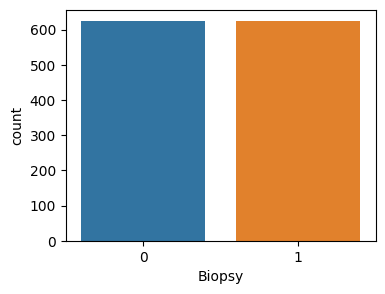

In [478]:
## Plot bar chart to visualize the imbalance of the target column
# Plot the bar chart
sns.countplot(x = 'Biopsy', data = train_upsampled)

print("train_upsampled.shape =", train_upsampled.shape)

As shown above, the class distribution is now balance between class 0 and class 1.

In [479]:
# Split the dataframe back into feature columns and target column
X_train_balanced = train_upsampled.drop('Biopsy', axis = 1)
y_train_balanced = train_upsampled['Biopsy']

# Upsampled/Balanced training set
print(X_train_balanced.shape)
print(y_train_balanced.shape)

(1250, 35)
(1250,)


In [480]:
X_vald_sqrt

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,4.242641,1.000000,14.0,1.414214,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,2.645751,2.563480,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.708204,2.000000,14.0,2.449490,0.0,0.000000,0.0,1.0,3.162278,1.0,...,0.0,2.645751,2.563480,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.000000,2.000000,16.0,1.732051,0.0,0.000000,0.0,1.0,1.000000,1.0,...,0.0,2.645751,2.563480,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.123106,1.732051,13.0,1.000000,1.0,1.414214,1.0,0.0,0.000000,0.0,...,0.0,2.645751,2.563480,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.291503,2.236068,14.0,2.000000,0.0,0.000000,0.0,1.0,1.732051,0.0,...,0.0,2.645751,2.563480,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,6.480741,1.732051,18.0,2.000000,0.0,0.000000,0.0,1.0,1.000000,0.0,...,1.0,4.242641,4.242641,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,5.656854,1.414214,21.0,1.414214,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,2.645751,2.563480,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,4.690416,1.523479,15.0,1.732051,0.0,0.000000,0.0,1.0,2.449490,0.0,...,0.0,2.645751,2.563480,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,5.385165,1.000000,22.0,1.462019,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,2.645751,2.563480,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [481]:
y_vald

416    0
12     0
756    0
806    0
163    1
      ..
674    0
158    0
647    0
817    0
403    0
Name: Biopsy, Length: 84, dtype: int64

Majority class:
 Biopsy
0    78
Name: count, dtype: int64

Minority class:
 Biopsy
1    6
Name: count, dtype: int64

---------------------------------------------------
After upsampling:
Biopsy
1    78
0    78
Name: count, dtype: int64

---------------------------------------------------
vald_upsampled.shape = (156, 36)
(156, 35)


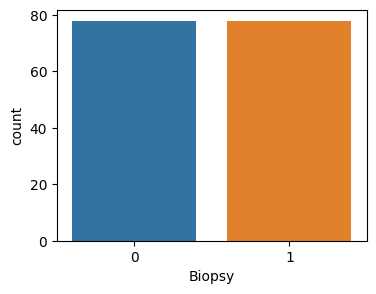

In [482]:
### Upsample Validation Set
# Repeat the upsampling process for validation set

# Reset index for y_train to concatenate with X_train_sqrt
y_vald = (y_vald.reset_index()).drop('index', axis = 1)

# Combining X_vald and y_vald into a dataframe for easy operation
vald = pd.concat([X_vald_sqrt, y_vald], axis = 1)

# Create two different dataframe for class 0 and 1
vald_major = vald[(vald['Biopsy']==0)]  # class 0 is the majority class
vald_minor = vald[(vald['Biopsy']==1)]  # class 1 is the minority class

# Display the number of values for each class in y
print("Majority class:\n", vald_major['Biopsy'].value_counts())
print("\nMinority class:\n", vald_minor['Biopsy'].value_counts())

# Get the frequency of majority class
majority_freq = vald_major['Biopsy'].count()

# Oversample the minority class with the number of majority class
vald_minor_upsampled = resample(vald_minor, replace=True, n_samples = majority_freq, random_state = 30)

# Combine majority class with upsampled minority class
vald_upsampled = pd.concat([vald_minor_upsampled, vald_major])

# Shuffle the rows in the dataframe, so that the class samples are not grouped together,
# to avoid the model from learning the sequence of the data
vald_upsampled = shuffle(vald_upsampled)

# Then reset the index
vald_upsampled = vald_upsampled.reset_index(drop = True)

# Display the number of values for each class in train upsampled
print("\n---------------------------------------------------")
print("After upsampling:")
print(vald_upsampled['Biopsy'].value_counts())

## Plot bar chart to visualize the imbalance of the target column
# Plot the bar chart
sns.countplot(x = 'Biopsy', data = vald_upsampled)

print("\n---------------------------------------------------")
print("vald_upsampled.shape =", vald_upsampled.shape)

# Split the dataframe back into feature columns and target column
X_vald_sqrt = vald_upsampled.drop('Biopsy', axis = 1)
y_vald = vald_upsampled['Biopsy']

# Upsampled/Balanced validation set
print(X_vald_sqrt.shape)

Majority class:
 Biopsy
0    78
Name: count, dtype: int64

Minority class:
 Biopsy
1    5
Name: count, dtype: int64

---------------------------------------------------
After upsampling:
Biopsy
1    78
0    78
Name: count, dtype: int64

---------------------------------------------------
test_upsampled.shape = (156, 36)
(156, 35)


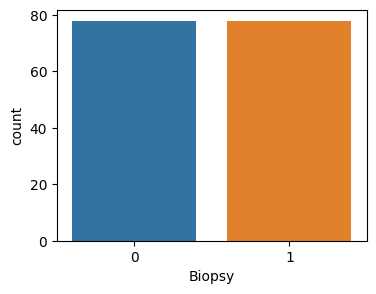

In [483]:
### Upsample Test Set
# Repeat the upsampling process for test set

# Reset index for y_train to concatenate with X_train_sqrt
y_test = (y_test.reset_index()).drop('index', axis = 1)

# Combining X_test and y_test into a dataframe for easy operation
test = pd.concat([X_test_sqrt, y_test], axis = 1)
test

# Create two different dataframe for class 0 and 1
test_major = test[(test['Biopsy']==0)]  # class 0 is the majority class
test_minor = test[(test['Biopsy']==1)]  # class 1 is the minority class

# Display the number of values for each class in y
print("Majority class:\n", test_major['Biopsy'].value_counts())
print("\nMinority class:\n", test_minor['Biopsy'].value_counts())

# Get the frequency of majority class
majority_freq = test_major['Biopsy'].count()

# Oversample the minority class with the number of majority class
test_minor_upsampled = resample(test_minor, replace=True, n_samples = majority_freq, random_state = 30)

# Combine majority class with upsampled minority class
test_upsampled = pd.concat([test_minor_upsampled, test_major])

# Shuffle the rows in the dataframe, so that the class samples are not grouped together,
# to avoid the model from learning the sequence of the data
test_upsampled = shuffle(test_upsampled)

# Then reset the index
test_upsampled = test_upsampled.reset_index(drop = True)

# Display the number of values for each class in train upsampled
print("\n---------------------------------------------------")
print("After upsampling:")
print(test_upsampled['Biopsy'].value_counts())

## Plot bar chart to visualize the imbalance of the target column
# Plot the bar chart
sns.countplot(x = 'Biopsy', data = test_upsampled)

print("\n---------------------------------------------------")
print("test_upsampled.shape =", test_upsampled.shape)

# Split the dataframe back into feature columns and target column
# We use back the original X_test_sqrt and y_test_sqrt (to avoid confusion)
X_test_sqrt = test_upsampled.drop('Biopsy', axis = 1)
y_test = test_upsampled['Biopsy']

# Upsampled/Balanced test set
print(X_test_sqrt.shape)

Succesfully upsampled X_train and y_trian:
- X_train_balanced
- y train_balanced  
  
We also upsampled validation set and test set.  
- X_vald_sqrt
- y_vald

- X_test_sqrt
- y_test  
  
Yes, we know that these 2 sets usually should not be upsampled.  
However, the positive (1) class is really under represented.  
Thus, if the model make a full negative (0) prediction like [0, 0, 0, 0, 0, 0, 0]  
The performance metric will still be high, like: accuracy = 0.93 etc

### Data Normalization

In [484]:
columns_need_norm = [] # Columns in the dataframe that needs to be normalized

# Function for Normalisation using MinMaxScaler
def Norm_MinMaxScaler(df):
    """This function normalizes a dataframe using MinMaxScaler"""
    for num in columns_need_norm:
        df_copy = df
        scaler = MinMaxScaler()
        df_copy.iloc[:,num:(num+1)] = scaler.fit_transform(df_copy.iloc[:,num:(num+1)])
    df_normalized = pd.DataFrame(df_copy, columns = df.columns)
    return df_normalized

In [485]:
# Training set (w/o upsampling) before normalized
X_train_sqrt.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,...,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,5.131835,1.540226,16.995468,1.442071,0.148485,0.384649,0.215440,0.651361,1.090351,0.117241,...,0.085548,2.458909,2.385887,0.025449,0.005988,0.025449,0.025449,0.038922,0.088323,0.053892
std,0.748547,0.438331,2.727776,0.456884,0.353709,1.019711,0.654163,0.447430,1.063700,0.299994,...,0.284827,0.338606,0.333586,0.157603,0.077208,0.157603,0.157603,0.193554,0.283977,0.225974
min,3.605551,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.582576,1.414214,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.482079,2.409060,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.099020,1.414214,17.000000,1.414214,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,2.482079,2.409060,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.656854,1.732051,18.000000,1.732051,0.000000,0.000000,0.000000,1.000000,1.732051,0.000000,...,0.000000,2.482079,2.409060,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.366600,5.291503,29.000000,3.162278,1.000000,6.082763,6.082763,1.000000,5.477226,1.000000,...,1.732051,4.690416,4.690416,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [486]:
# Training set (with upsampling) before normalized
X_train_balanced.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,...,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000
mean,5.217975,1.530501,17.162378,1.488318,0.151413,0.412972,0.214609,0.652887,1.162591,0.145423,...,0.137717,2.404431,2.338129,0.073600,0.012000,0.073600,0.061600,0.224000,0.468000,0.210400
std,0.781553,0.418452,2.680183,0.426925,0.355476,1.065414,0.607986,0.460719,1.254102,0.339622,...,0.346887,0.439992,0.428651,0.261223,0.108929,0.261223,0.240524,0.417089,0.499175,0.407756
min,3.605551,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.582576,1.414214,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.482079,2.409060,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.196152,1.414214,17.000000,1.414214,0.000000,0.000000,0.000000,1.000000,0.707107,0.000000,...,0.000000,2.482079,2.409060,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.744563,1.732051,18.000000,1.732051,0.000000,0.000000,0.000000,1.000000,1.732051,0.000000,...,0.000000,2.482079,2.409060,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,8.366600,5.291503,29.000000,3.162278,1.000000,6.082763,6.082763,1.000000,5.477226,1.000000,...,1.732051,4.690416,4.690416,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the max values of each column, we can see that the following columns from both balanced data and imbalanced data needs to be normalised:

- Column[0]: Age
- Column[1]: Number of sexual partners
- Column[2]: First sexual intercourse
- Column[3]: Num of pregnancies
- Column[5]: Smokes (years)
- Column[6]: Smokes (packs/year)
- Column[8]: Hormonal Contraceptives (years)
- Column[10]: IUD (years)
- Column[12]: STDs (number)
- Column[25]: STDs: Number of diagnosis
- Column[26]: STDs: Time since first diagnosis
- Column[27]: STDs: Time since last diagnosis


In [487]:
# Columns identified that needs normalization
columns_need_norm = [0,1,2,3,5,6,8,10,12,25,26,27]

X_train_norm = Norm_MinMaxScaler(X_train_sqrt)
X_train_norm_balanced = Norm_MinMaxScaler(X_train_balanced)
X_vald_norm = Norm_MinMaxScaler(X_vald_sqrt)
X_test_norm = Norm_MinMaxScaler(X_test_sqrt)

In [488]:
# Imbalanced training set (w/o upsampling) after normalized
X_train_norm

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,0.292887,0.096519,0.421053,0.447214,0.0,0.0,0.0,1.000000,0.091287,0.000000,...,0.0,0.401602,0.381816,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.449273,0.233019,0.421053,0.547723,0.0,0.0,0.0,1.000000,0.408248,0.000000,...,0.0,0.401602,0.381816,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.485298,0.000000,0.421053,0.447214,0.0,0.0,0.0,1.000000,0.258199,0.000000,...,0.0,0.401602,0.381816,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.000000,0.315789,1.000000,0.0,0.0,0.0,0.000000,0.000000,1.000000,...,0.0,0.401602,0.381816,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.250004,0.096519,0.368421,0.316228,0.0,0.0,0.0,1.000000,0.182574,0.000000,...,0.0,0.401602,0.381816,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,0.393122,0.000000,0.631579,0.447214,0.0,0.0,0.0,1.000000,0.073030,0.000000,...,0.0,0.401602,0.381816,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664,0.485298,0.170581,0.315789,0.547723,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.401602,0.381816,0.0,0.0,0.0,0.0,0.0,0.0,0.0
665,0.354113,0.096519,0.421053,0.774597,0.0,0.0,0.0,1.000000,0.483046,0.000000,...,0.0,0.401602,0.381816,0.0,0.0,0.0,0.0,0.0,0.0,0.0
666,0.485298,0.288027,0.684211,0.447214,0.0,0.0,0.0,1.000000,0.104881,0.000000,...,0.0,0.401602,0.381816,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [489]:
# Balanced training set (with upsampling) before normalized
X_train_norm_balanced

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,0.354113,0.170581,0.263158,0.707107,1.0,0.569495,0.569495,0.000000,0.000000,0.000000,...,0.00000,0.401602,0.381816,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.373786,0.096519,0.421053,0.632456,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.401602,0.381816,1.0,0.0,1.0,1.0,0.0,1.0,1.0
2,0.354113,0.233019,0.421053,0.632456,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.401602,0.381816,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.158231,0.000000,0.315789,0.316228,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.401602,0.381816,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.133813,0.096519,0.315789,0.316228,0.0,0.000000,0.000000,1.000000,0.182574,0.000000,...,0.00000,0.401602,0.381816,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,0.467418,0.096519,0.368421,0.547723,0.0,0.000000,0.000000,1.000000,0.547723,1.000000,...,0.00000,0.401602,0.381816,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1246,0.205212,0.233019,0.263158,0.316228,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.401602,0.381816,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1247,0.571093,0.000000,0.421053,0.316228,0.0,0.000000,0.000000,1.000000,0.091287,0.000000,...,0.57735,0.112240,0.112240,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1248,0.182015,0.096519,0.315789,0.316228,0.0,0.000000,0.000000,0.651361,0.278007,0.117241,...,0.00000,0.401602,0.381816,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [490]:
# Validation set after normalized
X_vald_norm

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,0.163395,0.000000,0.294118,0.577350,0.0,0.0,0.0,1.0,0.397360,0.0,...,0.000000,0.507534,0.482163,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.163395,0.226541,0.352941,0.596867,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.507534,0.482163,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.389175,0.226541,0.294118,0.707107,0.0,0.0,0.0,1.0,0.725476,0.0,...,0.000000,0.507534,0.482163,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.184349,0.546918,0.235294,0.408248,0.0,0.0,0.0,1.0,0.162221,0.0,...,0.000000,0.507534,0.482163,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.301143,0.226541,0.411765,0.577350,0.0,0.0,0.0,1.0,0.148678,1.0,...,0.707107,0.507534,0.507534,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.301143,0.676028,0.117647,0.816497,0.0,0.0,0.0,1.0,0.397360,0.0,...,0.000000,0.507534,0.482163,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,0.184349,0.546918,0.235294,0.408248,0.0,0.0,0.0,1.0,0.162221,0.0,...,0.000000,0.507534,0.482163,0.0,0.0,0.0,0.0,0.0,1.0,0.0
153,0.422502,0.226541,0.294118,0.707107,0.0,0.0,0.0,1.0,0.229416,0.0,...,0.000000,0.507534,0.482163,0.0,0.0,0.0,0.0,1.0,1.0,0.0
154,0.141936,0.226541,0.294118,0.408248,0.0,0.0,0.0,1.0,0.064889,0.0,...,0.000000,0.507534,0.482163,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [491]:
# Test set after normalized
X_test_norm

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,0.155051,0.338555,0.285714,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.449459,0.449459,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.070333,0.191564,0.095238,0.426401,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.449459,0.449459,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.303035,0.191564,0.285714,0.488190,0.0,0.000000,0.000000,0.642857,0.379210,0.073529,...,0.0,0.449459,0.449459,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.476242,0.191564,0.428571,0.522233,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.0,0.449459,0.449459,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.626860,0.338555,0.285714,0.738549,1.0,1.000000,0.476095,0.000000,0.000000,1.000000,...,0.0,0.449459,0.449459,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.431660,0.191564,0.333333,0.488190,0.0,0.000000,0.000000,0.000000,0.000000,0.073529,...,1.0,1.000000,1.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0
152,0.353130,0.191564,0.285714,0.301511,0.0,0.000000,0.000000,0.642857,0.379210,0.073529,...,0.0,0.449459,0.449459,0.0,0.0,1.0,1.0,0.0,0.0,0.0
153,0.400926,0.571651,0.000000,0.488190,1.0,0.664211,1.000000,1.000000,0.966092,0.000000,...,0.0,0.449459,0.449459,0.0,0.0,0.0,0.0,1.0,1.0,1.0
154,0.092373,0.338555,0.285714,0.301511,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.449459,0.449459,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Feature set which completed normalization:
1. X_train_norm
2. X_train_norm_balanced
3. X_vald_norm
4. X_test_norm

### Data Standardization 

In [492]:
columns_need_std = [] # Columns in the dataframe that needs to be standardized

# Function for Standardization using StandardScaler
def Std_StandardScaler(df):
    for num in columns_need_norm:
        df_copy = df
        scaler = StandardScaler()
        df_copy.iloc[:,num:(num+1)] = scaler.fit_transform(df_copy.iloc[:,num:(num+1)])
    df_normalized = pd.DataFrame(df_copy, columns = df.columns)
    return df_normalized

In [493]:
# Training set (with upsampling) before standardized 
X_train_norm_balanced

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,0.354113,0.170581,0.263158,0.707107,1.0,0.569495,0.569495,0.000000,0.000000,0.000000,...,0.00000,0.401602,0.381816,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.373786,0.096519,0.421053,0.632456,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.401602,0.381816,1.0,0.0,1.0,1.0,0.0,1.0,1.0
2,0.354113,0.233019,0.421053,0.632456,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.401602,0.381816,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.158231,0.000000,0.315789,0.316228,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.401602,0.381816,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.133813,0.096519,0.315789,0.316228,0.0,0.000000,0.000000,1.000000,0.182574,0.000000,...,0.00000,0.401602,0.381816,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,0.467418,0.096519,0.368421,0.547723,0.0,0.000000,0.000000,1.000000,0.547723,1.000000,...,0.00000,0.401602,0.381816,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1246,0.205212,0.233019,0.263158,0.316228,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.401602,0.381816,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1247,0.571093,0.000000,0.421053,0.316228,0.0,0.000000,0.000000,1.000000,0.091287,0.000000,...,0.57735,0.112240,0.112240,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1248,0.182015,0.096519,0.315789,0.316228,0.0,0.000000,0.000000,0.651361,0.278007,0.117241,...,0.00000,0.401602,0.381816,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [494]:
# Print to see which has columns has continuous values, which has only categorical values.
for column in X_train_norm_balanced.columns:
    unique_values = X_train_norm_balanced[column].unique()
    print(f"{column}'s unique values: {unique_values}\n")

Age's unique values: [0.35411342 0.37378602 0.15823145 0.13381282 0.18201549 0.20521201
 0.25000378 0.58759592 0.27166875 0.53745776 0.46741813 0.55438344
 0.44927313 0.05617083 0.4852982  0.65167417 0.22786249 0.57109348
 0.75730186 0.50292461 0.66724344 0.33408628 0.10870595 0.43085105
 0.41213881 0.52030787 0.29288687 0.39312225 0.69788233 0.08284912
 0.3136847  0.62000775 0.60389831 0.68264438 0.         0.02858742
 0.63593093 1.         0.72788928 0.71296236]

Number of sexual partners's unique values: [0.17058147 0.09651947 0.23301862 0.         0.28802685 0.33775809
 0.14011268 0.46603723 0.38349069 0.42605756 0.6694586  1.        ]

First sexual intercourse's unique values: [0.26315789 0.42105263 0.31578947 0.36842105 0.21052632 0.52631579
 0.63157895 1.         0.47368421 0.94736842 0.15789474 0.36818254
 0.84210526 0.57894737 0.73684211 0.10526316 0.68421053 0.89473684
 0.         0.78947368]

Num of pregnancies's unique values: [0.70710678 0.63245553 0.31622777 0.47833043 0.

We want to standardize only numeric data and not categorical data, therefore only the following columns are chosen, similar to those that are normalized:

- Column[0]: Age
- Column[1]: Number of sexual partners
- Column[2]: First sexual intercourse
- Column[3]: Num of pregnancies
- Column[5]: Smokes (years)
- Column[6]: Smokes (packs/year)
- Column[8]: Hormonal Contraceptives (years)
- Column[10]: IUD (years)
- Column[12]: STDs (number)
- Column[25]: STDs: Number of diagnosis
- Column[26]: STDs: Time since first diagnosis
- Column[27]: STDs: Time since last diagnosis

In [495]:
# Columns identified that needs normalization
columns_need_std = [0,1,2,3,5,6,8,10,12,25,26,27]

X_train_std = Std_StandardScaler(X_train_norm)
X_vald_std = Std_StandardScaler(X_vald_norm)
X_test_std = Std_StandardScaler(X_test_norm)
X_train_std_balanced = Std_StandardScaler(X_train_norm_balanced)

In [496]:
# X_train after standardized
X_train_std

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,-0.176252,-0.287698,0.368536,-0.061019,0.0,-0.377496,-0.329583,1.000000,-0.555414,0.000000,...,-0.300577,0.068479,0.069518,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.819170,1.049706,0.368536,0.635166,0.0,-0.377496,-0.329583,1.000000,1.077912,0.000000,...,-0.300577,0.068479,0.069518,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.048475,-1.233385,0.368536,-0.061019,0.0,-0.377496,-0.329583,1.000000,0.304696,0.000000,...,-0.300577,0.068479,0.069518,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.324630,-1.233385,-0.365211,3.767908,0.0,-0.377496,-0.329583,0.000000,-1.025823,1.000000,...,-0.300577,0.068479,0.069518,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.449210,-0.287698,0.001663,-0.968305,0.0,-0.377496,-0.329583,1.000000,-0.085004,0.000000,...,-0.300577,0.068479,0.069518,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,0.461761,-1.233385,1.836032,-0.061019,0.0,-0.377496,-0.329583,1.000000,-0.649496,0.000000,...,-0.300577,0.068479,0.069518,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664,1.048475,0.437954,-0.365211,0.635166,0.0,-0.377496,-0.329583,0.000000,-1.025823,0.000000,...,-0.300577,0.068479,0.069518,0.0,0.0,0.0,0.0,0.0,0.0,0.0
665,0.213464,-0.287698,0.368536,2.206630,0.0,-0.377496,-0.329583,1.000000,1.463350,0.000000,...,-0.300577,0.068479,0.069518,0.0,0.0,0.0,0.0,0.0,0.0,0.0
666,1.048475,1.588671,2.202905,-0.061019,0.0,-0.377496,-0.329583,1.000000,-0.485364,0.000000,...,-0.300577,0.068479,0.069518,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [497]:
# X_train (balanced) after standardized
X_train_std_balanced

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,0.094116,0.481848,-0.807125,1.752180,1.0,2.864943,5.346822,0.000000,-0.927402,0.000000,...,-0.397168,0.176545,0.165541,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.214006,-0.278011,0.312649,1.199009,0.0,-0.387771,-0.353125,0.000000,-0.927402,0.000000,...,-0.397168,0.176545,0.165541,1.0,0.0,1.0,1.0,0.0,1.0,1.0
2,0.094116,1.122439,0.312649,1.199009,0.0,-0.387771,-0.353125,0.000000,-0.927402,0.000000,...,-0.397168,0.176545,0.165541,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.099631,-1.268279,-0.433867,-1.144261,0.0,-0.387771,-0.353125,0.000000,-0.927402,0.000000,...,-0.397168,0.176545,0.165541,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.248443,-0.278011,-0.433867,-1.144261,0.0,-0.387771,-0.353125,1.000000,-0.129700,0.000000,...,-0.397168,0.176545,0.165541,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,0.784620,-0.278011,-0.060609,0.571132,0.0,-0.387771,-0.353125,1.000000,1.465706,1.000000,...,-0.397168,0.176545,0.165541,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1246,-0.813321,1.122439,-0.807125,-1.144261,0.0,-0.387771,-0.353125,0.000000,-0.927402,0.000000,...,-0.397168,0.176545,0.165541,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1247,1.416440,-1.268279,0.312649,-1.144261,0.0,-0.387771,-0.353125,1.000000,-0.528551,0.000000,...,2.486773,-2.251437,-2.156267,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1248,-0.954686,-0.278011,-0.433867,-1.144261,0.0,-0.387771,-0.353125,0.651361,0.287263,0.117241,...,-0.397168,0.176545,0.165541,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [498]:
# X_vald after standardized
X_vald_std

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,-0.813631,-1.354656,-0.011226,-0.165773,0.0,-0.434825,-0.421309,1.0,0.510546,0.0,...,-0.381774,0.037989,0.010738,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-0.813631,-0.251153,0.426576,-0.031881,0.0,-0.434825,-0.421309,0.0,-1.413316,0.0,...,-0.381774,0.037989,0.010738,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.873811,-0.251153,-0.011226,0.724409,0.0,-0.434825,-0.421309,1.0,2.099160,0.0,...,-0.381774,0.037989,0.010738,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.657025,1.309437,-0.449027,-1.325879,0.0,-0.434825,-0.421309,1.0,-0.627903,0.0,...,-0.381774,0.037989,0.010738,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.215875,-0.251153,0.864378,-0.165773,0.0,-0.434825,-0.421309,1.0,-0.693473,1.0,...,2.535639,0.037989,0.387287,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.215875,1.938344,-1.324631,1.474866,0.0,-0.434825,-0.421309,1.0,0.510546,0.0,...,-0.381774,0.037989,0.010738,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,-0.657025,1.309437,-0.449027,-1.325879,0.0,-0.434825,-0.421309,1.0,-0.627903,0.0,...,-0.381774,0.037989,0.010738,0.0,0.0,0.0,0.0,0.0,1.0,0.0
153,1.122889,-0.251153,-0.011226,0.724409,0.0,-0.434825,-0.421309,1.0,-0.302574,0.0,...,-0.381774,0.037989,0.010738,0.0,0.0,0.0,0.0,1.0,1.0,0.0
154,-0.974012,-0.251153,-0.011226,-1.325879,0.0,-0.434825,-0.421309,1.0,-1.099151,0.0,...,-0.381774,0.037989,0.010738,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [499]:
# X_test after standardized
X_test_std

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,-0.964046,0.164446,0.143960,-2.092980,0.0,-0.681962,-0.616928,0.000000,-0.745752,0.000000,...,-0.457496,-0.174983,-0.174983,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-1.430202,-0.726975,-1.142252,-0.149345,0.0,-0.681962,-0.616928,0.000000,-0.745752,0.000000,...,-0.457496,-0.174983,-0.174983,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.149778,-0.726975,0.143960,0.132301,0.0,-0.681962,-0.616928,0.642857,0.374791,0.073529,...,-0.457496,-0.174983,-0.174983,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.803282,-0.726975,1.108619,0.287477,0.0,-0.681962,-0.616928,0.000000,-0.745752,1.000000,...,-0.457496,-0.174983,-0.174983,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.632042,0.164446,0.143960,1.273495,1.0,1.959996,0.800953,0.000000,-0.745752,1.000000,...,-0.457496,-0.174983,-0.174983,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.557971,-0.726975,0.465513,0.132301,0.0,-0.681962,-0.616928,0.000000,-0.745752,0.073529,...,2.185813,3.417239,3.417239,0.0,1.0,0.0,1.0,0.0,1.0,0.0
152,0.125865,-0.726975,0.143960,-0.718622,0.0,-0.681962,-0.616928,0.642857,0.374791,0.073529,...,-0.457496,-0.174983,-0.174983,0.0,0.0,1.0,1.0,0.0,0.0,0.0
153,0.388863,1.578035,-1.785359,0.132301,1.0,1.072856,2.361218,1.000000,2.108993,0.000000,...,-0.457496,-0.174983,-0.174983,0.0,0.0,0.0,0.0,1.0,1.0,1.0
154,-1.308927,0.164446,0.143960,-0.718622,0.0,-0.681962,-0.616928,0.000000,-0.745752,0.000000,...,-0.457496,-0.174983,-0.174983,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Selection
Perform feature selection to select the relevant features.
______________________________________________________________________________________
Description:

Feature selection is done to select the features that most correlated with our target feature. 
So that we can :

- Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.

- Improves Accuracy: Less misleading data means modeling accuracy improves.

- Reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.

We will be conducting the feaature selection by 
1. Building a Correlation Matrix Heatmap (using Pearson Correlation Coefficient)
2. Identifying the features with correlation coefficient closer to 0 (weaker correlation)
3. Drop the columns with weak correlation

At the end of this Feature Selection Section,

Imbalanced training set will be represented by:
- X_train
- y_train

Balanced/Upsampled training set will be represented by:
- X_train_balanced
- y_train_balanced

Validation set will be represented by:
- X_vald
- y_vald

Test set will be represented by:
- X_test
- y_test



##### 1. Correlation Matrix Heatmap

In [500]:
# Concatenate X_train_std and y_train
train_corr = pd.concat([X_train_std, y_train_reset_index], axis = 1)
train_corr

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,-0.176252,-0.287698,0.368536,-0.061019,0.0,-0.377496,-0.329583,1.000000,-0.555414,0.000000,...,0.068479,0.069518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.819170,1.049706,0.368536,0.635166,0.0,-0.377496,-0.329583,1.000000,1.077912,0.000000,...,0.068479,0.069518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.048475,-1.233385,0.368536,-0.061019,0.0,-0.377496,-0.329583,1.000000,0.304696,0.000000,...,0.068479,0.069518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,4.324630,-1.233385,-0.365211,3.767908,0.0,-0.377496,-0.329583,0.000000,-1.025823,1.000000,...,0.068479,0.069518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-0.449210,-0.287698,0.001663,-0.968305,0.0,-0.377496,-0.329583,1.000000,-0.085004,0.000000,...,0.068479,0.069518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,0.461761,-1.233385,1.836032,-0.061019,0.0,-0.377496,-0.329583,1.000000,-0.649496,0.000000,...,0.068479,0.069518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
664,1.048475,0.437954,-0.365211,0.635166,0.0,-0.377496,-0.329583,0.000000,-1.025823,0.000000,...,0.068479,0.069518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
665,0.213464,-0.287698,0.368536,2.206630,0.0,-0.377496,-0.329583,1.000000,1.463350,0.000000,...,0.068479,0.069518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
666,1.048475,1.588671,2.202905,-0.061019,0.0,-0.377496,-0.329583,1.000000,-0.485364,0.000000,...,0.068479,0.069518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


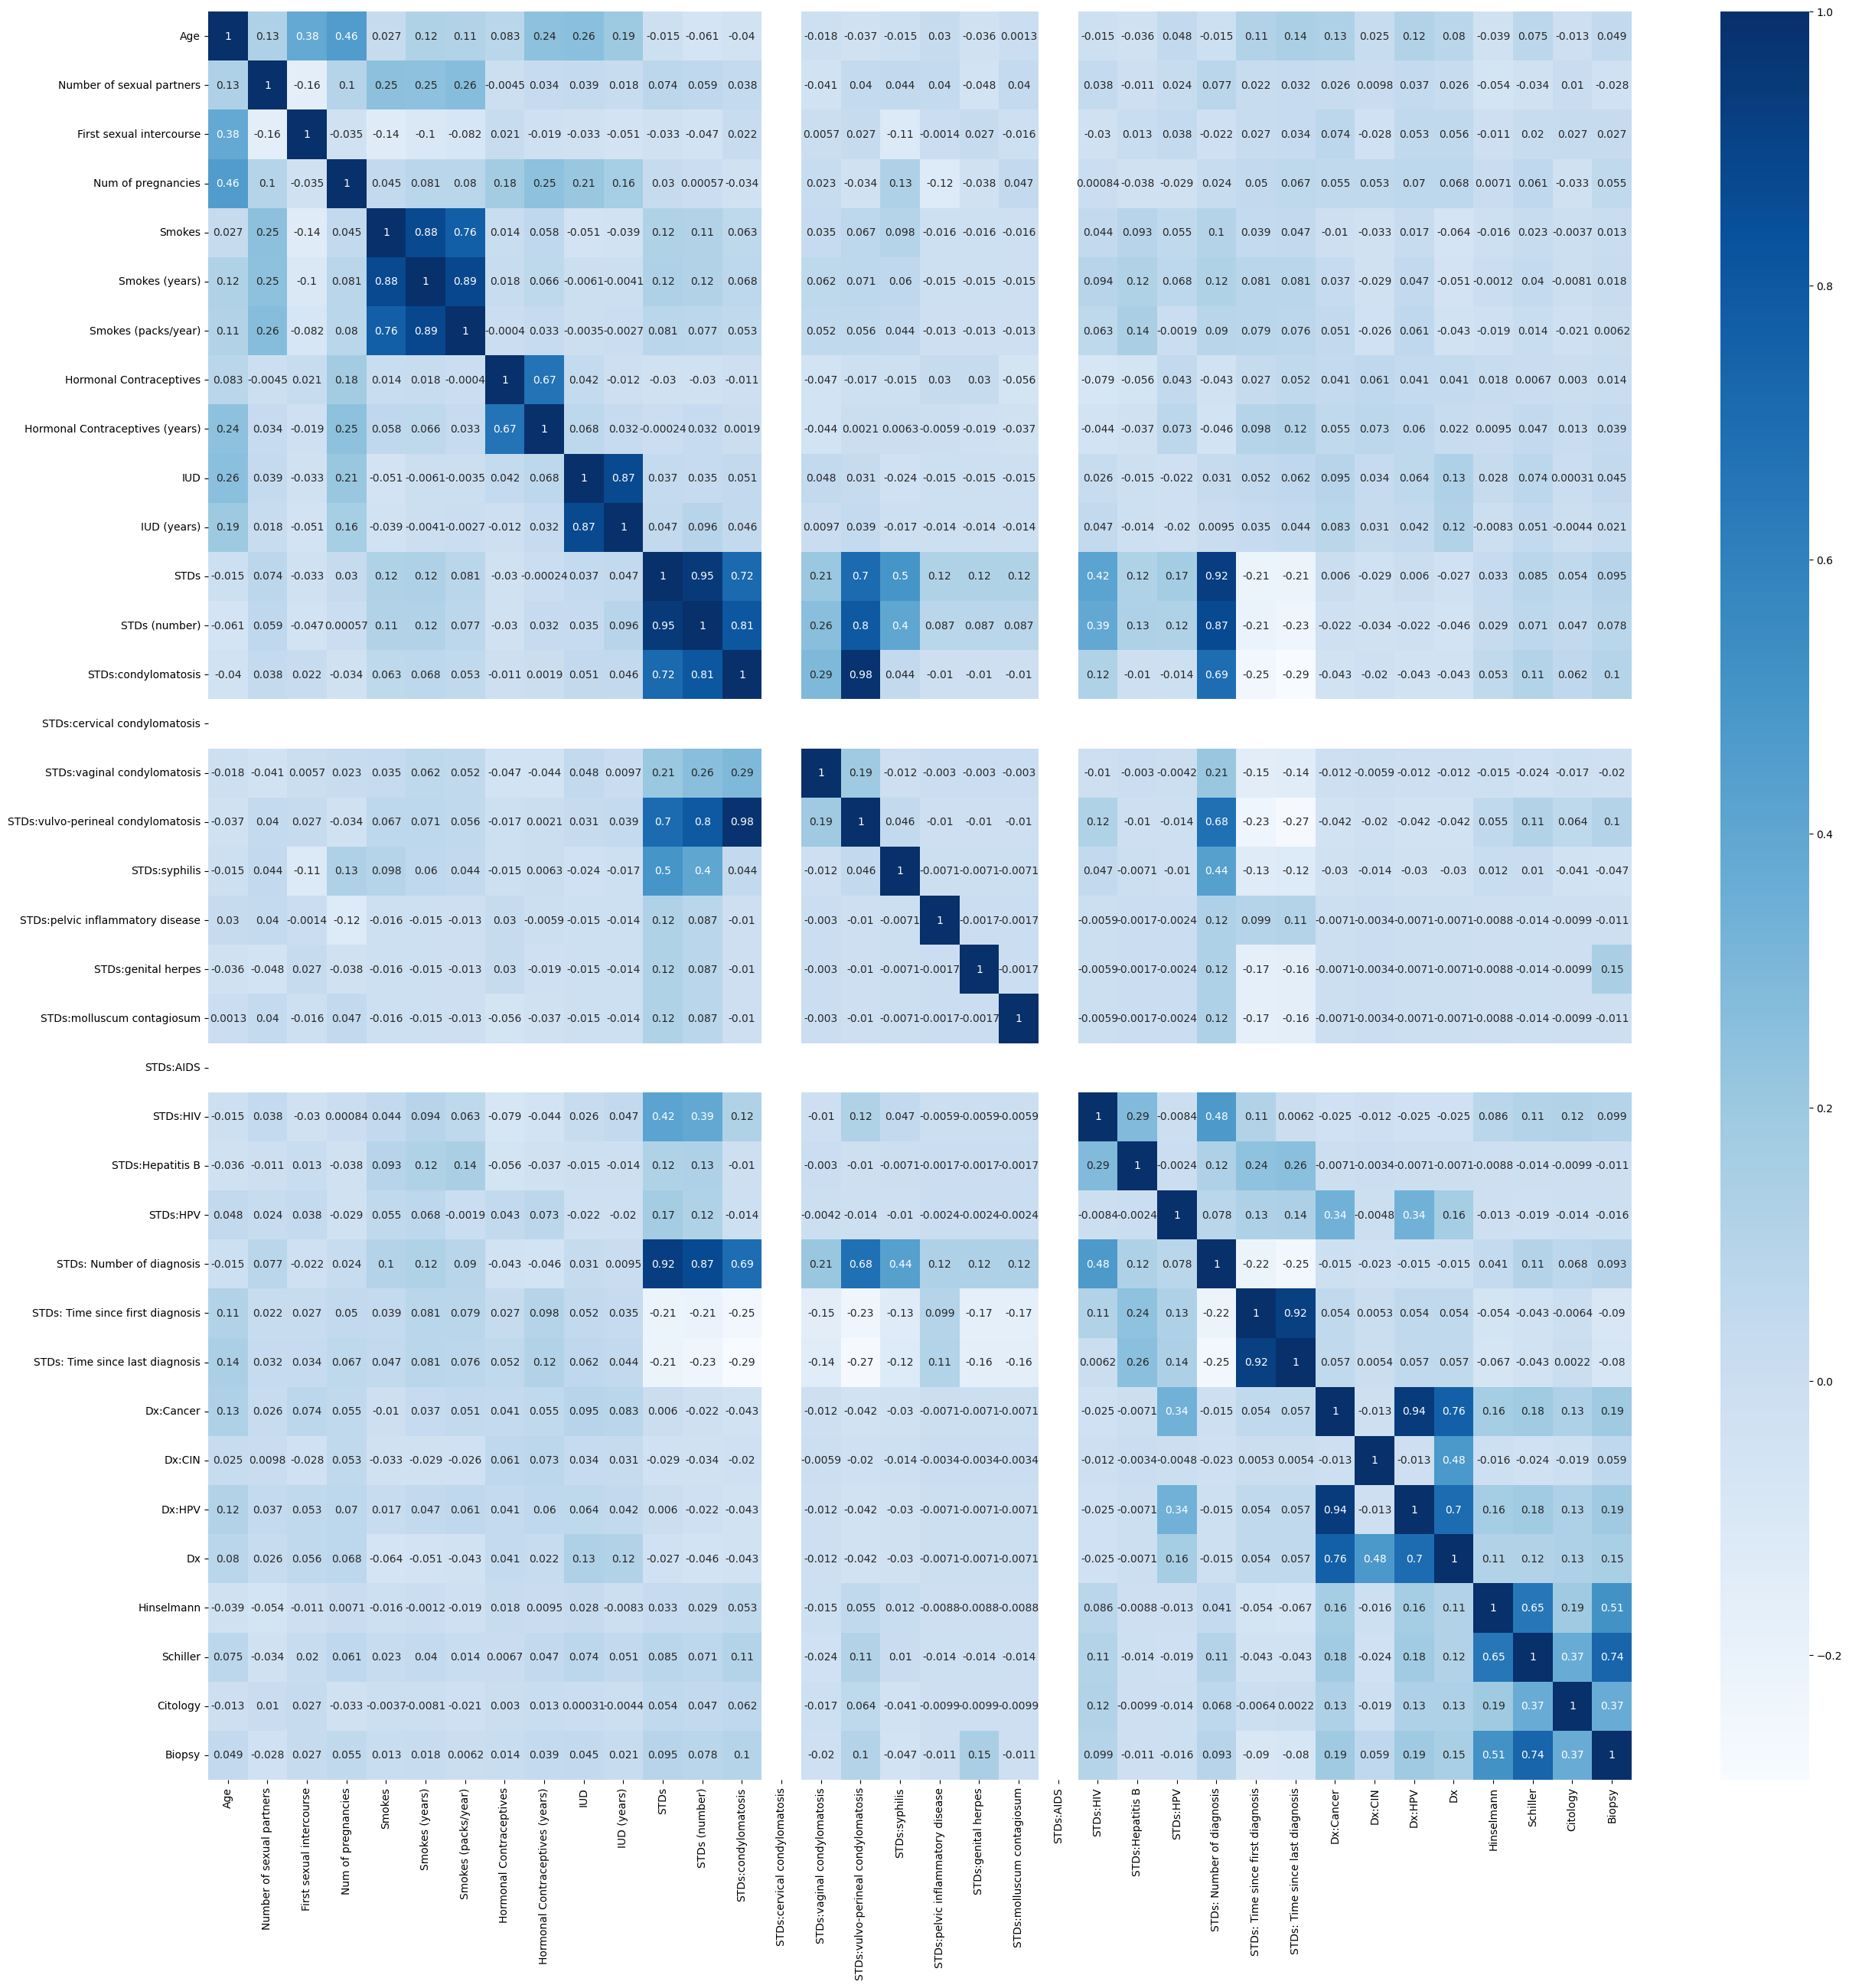

In [501]:
# Create a correlation matrix on the imbalanced training set
corr_matrix = train_corr.corr(method = 'pearson')
top_corr_features = corr_matrix.index

# Plot the correlation matrix heat map
plt.figure(figsize=(30,30))
g=sns.heatmap(train_corr[top_corr_features].corr(),annot=True,cmap="Blues")
plt.show()




##### 2. Identifying the low correlation features

In [502]:
# List out the correlation coefficients of the features and the target value by ascending order
corr_biopsy = pd.DataFrame(corr_matrix['Biopsy'])
corr_biopsy.sort_values("Biopsy")

,Biopsy
STDs: Time since first diagnosis,-0.089817
STDs: Time since last diagnosis,-0.080477
STDs:syphilis,-0.047036
Number of sexual partners,-0.027874
STDs:vaginal condylomatosis,-0.019522
STDs:HPV,-0.015926
STDs:pelvic inflammatory disease,-0.011252
STDs:Hepatitis B,-0.011252
STDs:molluscum contagiosum,-0.011252
Smokes (packs/year),0.006194


We can identify that the columns 'STDs:cervical condylomatosis' and 'STDs:AIDS' in this dataframe. On the other hand, columns 'STDs:HPV', 'STDs:molluscum contagiosum', 'STDs:pelvic inflammatory disease', 'STDs:Hepatitis B', 'Hormonal Contraceptives' and 'First sexual intercourse' all have a low magnitude of correlation coefficient regardless of the direction, which are all not more than 0.02.



In [503]:
drop_features = ['STDs:cervical condylomatosis','STDs:AIDS','STDs:HPV','STDs:molluscum contagiosum','STDs:pelvic inflammatory disease','STDs:Hepatitis B','Hormonal Contraceptives','First sexual intercourse']
drop_features_index = [df.columns.get_loc(col)for col in drop_features]
drop_features_index

[14, 21, 24, 20, 18, 23, 7, 2]

Thus, the identified columns to be dropped are:
- Column[2]: First sexual intercourse
- Column[7]: Hormonal Contraceptives
- Column[14]: STDs:cervical condylomatosis
- Column[18]: STDs:pelvic inflammatory disease
- Column[20]: STDs:molluscum contagiosum
- Column[21]: STDs:AIDS
- Column[23]: STDs:Hepatitis B
- Column[24]: STDs:HPV

##### 3. Drop low correlating features

In [504]:
# Drop the identified columns in the training, validation and test set of the imbalanced data
for string in drop_features:
    X_train = X_train_std.drop(axis = 1, columns = drop_features)
    X_vald = X_vald_std.drop(axis = 1, columns = drop_features)
    X_test = X_test_std.drop(axis = 1, columns = drop_features)
    X_train_balanced = X_train_std_balanced.drop(axis = 1, columns = drop_features)

In [505]:
# Shapes of each sets after dropping the columns, from 35 columns --> 27 columns
print("After feature selection:\n")
print("X_train's shape:", X_train.shape)
print("X_train_balanced:", X_train_balanced.shape)
print("X_vald's shape :", X_vald.shape)
print("X_test's shape :", X_test.shape)

After feature selection:

X_train's shape: (668, 27)
X_train_balanced: (1250, 27)
X_vald's shape : (156, 27)
X_test's shape : (156, 27)


## Data modeling
Build the machine learning models. You must build atleast two (2) predictive models. One of the predictive models must be either Decision Tree or Support Vector Machine.
______________________________________________________________________________________
Description: Our group selected Decision Tree and Support Vector Machine(SVM), we built 2 predictive model to predict the target variable of cervical cancer dataset which is 'biopsy'

### Decision Tree

In [506]:
#Build mode, Decision Tree 
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [507]:
#Predict on validation set
y_vald_pred= tree_model.predict(X_vald)

In [508]:
#Evaluate the performance
dt_accuracy = accuracy_score(y_vald, y_vald_pred)
dt_precision = precision_score(y_vald, y_vald_pred)
dt_recall = recall_score(y_vald, y_vald_pred)
dt_f1 = f1_score(y_vald, y_vald_pred)

print("Accuracy of decision tree:", dt_accuracy)
print("Precision of decision tree:", dt_precision)
print("Recall of decision tree:", dt_recall)
print("F1 Score of decision tree:", dt_f1)

Accuracy of decision tree: 0.6794871794871795
Precision of decision tree: 0.9375
Recall of decision tree: 0.38461538461538464
F1 Score of decision tree: 0.5454545454545454


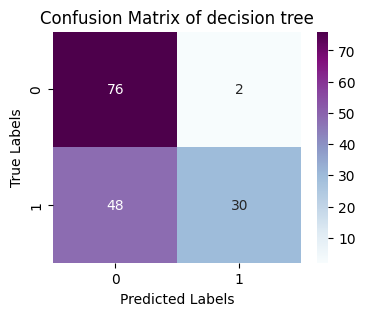

In [509]:
#confusion matrix
conf_m =confusion_matrix(y_vald,y_vald_pred)

#visualize confusion matrix
sns.heatmap(conf_m, annot = True, fmt='d',cmap='BuPu')
plt.title('Confusion Matrix of decision tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [510]:
# Predict on test set
y_test_pred= tree_model.predict(X_test)

In [511]:
# Evaluate decision tree model's performance on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy of decision tree:", test_accuracy)

Test Accuracy of decision tree: 0.8653846153846154


### Support Vector Machine (SVM)
The second predictive model we have chose is Support Vector Machine (SVM). SVM algorithms determine the hyperplane boundary to classify data and make predictions. The three popular types of kernels used in SVM are:

<li> Linear Kernel
<li> Polynomial Kernel
<li> Radial Basis Function (RBF) Kernel
<li> Sigmoid Kernel

#### Determine which kernel is the most suitable

In [512]:
# Define parameter grids for hyperparameter tuning
para_linear = {'C': [0.1, 1, 10]}
para_poly = {'C': [0.1, 1, 10], 'degree': [2, 3, 4]}
para_RBF = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
para_sigmoid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}

In [513]:
# Perform hyperparameter tuning using grid search
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 1, 10], 'degree':[2, 3, 4], 'gamma':[0.1, 1, 10], 'coef0':[0.1, 1, 10], 'gamma':[0.1, 1, 10]}

SVM_model = GridSearchCV(SVC(kernel='linear'), parameters)

SVM_model.fit(X_train_balanced, y_train_balanced)

SVM_model.best_params_

{'C': 1, 'coef0': 0.1, 'degree': 2, 'gamma': 10, 'kernel': 'rbf'}

### Test using unbalanced data

##### Linear Kernel Model Accuracy

In [514]:
# Train the model with linear kernel and find the best model
clf_linear.fit(X_train, y_train)
best_linear = clf_linear.best_estimator_

NameError: name 'clf_linear' is not defined

In [ ]:
# Prediction on the validation set
y_pred_linear_vald = best_linear.predict(X_vald)

In [ ]:
# Prediction on the test set
y_pred_linear = best_linear.predict(X_test)

##### Polynomial Kernel Model Accuracy

In [ ]:
# Train the model with polynomial kernel and find the best model
clf_poly.fit(X_train, y_train)
best_poly = clf_poly.best_estimator_

In [ ]:
# Prediction on the validation set
y_pred_poly_vald = best_poly.predict(X_vald)

In [ ]:
# Prediction on the test set
y_pred_poly = best_poly.predict(X_test)

##### RBF Kernel Model Accuracy 

In [ ]:
# Train the model with RBF kernel and find the best model
clf_RBF.fit(X_train, y_train)
best_RBF = clf_RBF.best_estimator_

In [ ]:
# Prediction on the validation set
y_pred_RBF_vald = best_RBF.predict(X_vald)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Prediction on the test set
y_pred_RBF = best_RBF.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

##### Sigmoid Kernel Model Accuracy

In [ ]:
# Train the model with sigmoid kernel and find the best model
clf_sigmoid.fit(X_train, y_train)
best_sigmoid = clf_sigmoid.best_estimator_

In [ ]:
# Prediction on the validation set
y_pred_sigmoid_vald = best_sigmoid.predict(X_vald)

In [ ]:
# Prediction on the test set
y_pred_sigmoid = best_sigmoid.predict(X_test)

#### Accuracy on the validation sets

In [ ]:
print("Accuracy for linear kernel:",metrics.accuracy_score(y_vald, y_pred_linear_vald))
print("Accuracy for polynomial kernel:",metrics.accuracy_score(y_vald, y_pred_poly_vald))
print("Accuracy for RBF kernel:",metrics.accuracy_score(y_vald, y_pred_RBF_vald))
print("Accuracy for sigmoid kernel:",metrics.accuracy_score(y_vald, y_pred_sigmoid_vald))

Accuracy for linear kernel: 0.9761904761904762
Accuracy for polynomial kernel: 0.9285714285714286
Accuracy for RBF kernel: 0.9285714285714286
Accuracy for sigmoid kernel: 0.9404761904761905


#### Accuracy on the test sets

In [ ]:
print("Accuracy for linear kernel:",metrics.accuracy_score(y_test, y_pred_linear))
print("Accuracy for polynomial kernel:",metrics.accuracy_score(y_test, y_pred_poly))
print("Accuracy for RBF kernel:",metrics.accuracy_score(y_test, y_pred_RBF))
print("Accuracy for sigmoid kernel:",metrics.accuracy_score(y_test, y_pred_sigmoid))

Accuracy for linear kernel: 0.9397590361445783
Accuracy for polynomial kernel: 0.9397590361445783
Accuracy for RBF kernel: 0.9156626506024096
Accuracy for sigmoid kernel: 0.9036144578313253


### Test using the balanced data

##### Linear Kernel Model Accuracy

In [ ]:
# Train the model with linear kernel and find the best model
clf_linear.fit(X_train_balanced, y_train_balanced)
best_linear1 = clf_linear.best_estimator_

In [ ]:
# Prediction on the validation set
y1_pred_linear_vald = best_linear1.predict(X_vald)

##### Polynomial Kernel Model Accuracy

In [ ]:
# Train the model with polynomial kernel and find the best model
clf_poly.fit(X_train_balanced, y_train_balanced)
best_poly1 = clf_poly.best_estimator_

In [ ]:
# Prediction on the validation set
y1_pred_poly_vald = best_poly1.predict(X_vald)

##### RBF Kernel Model Accuracy

##### Sigmoid Kernel Model Accuracy

In [ ]:
# Train the model with sigmoid kernel and find the best model
clf_sigmoid.fit(X_train_balanced, y_train_balanced)
best_sigmoid1 = clf_sigmoid.best_estimator_

In [ ]:
# Prediction on the validation set
y1_pred_sigmoid_vald = best_sigmoid1.predict(X_vald)


#### Accuracy on the validation sets

In [ ]:
print("Accuracy for linear kernel:",metrics.accuracy_score(y_vald, y1_pred_linear_vald))
print("Accuracy for polynomial kernel:",metrics.accuracy_score(y_vald, y1_pred_poly_vald))
print("Accuracy for RBF kernel:",metrics.accuracy_score(y_vald, y1_pred_RBF_vald))
print("Accuracy for sigmoid kernel:",metrics.accuracy_score(y_vald, y1_pred_sigmoid_vald))

NameError: name 'y1_pred_linear_vald' is not defined

## Evaluate the models
Perform a comparison between the predictive models. <br>
Report the accuracy, recall, precision and F1-score measures as well as the confusion matrix if it is a classification problem. <br>
Report the R2 score, mean squared error and mean absolute error if it is a regression problem.
______________________________________________________________________________________
Description:

#### Accuracy on the test sets

In [ ]:
# Prediction on the test set
y1_pred_poly = best_poly1.predict(X_test)

In [ ]:
# Prediction on the test set
y1_pred_sigmoid = best_sigmoid1.predict(X_test)


In [ ]:
# Prediction on the test set
y1_pred_linear = best_linear1.predict(X_test)

In [ ]:
print("Accuracy for linear kernel:",metrics.accuracy_score(y_test, y1_pred_linear))
print("Accuracy for polynomial kernel:",metrics.accuracy_score(y_test, y1_pred_poly))
print("Accuracy for RBF kernel:",metrics.accuracy_score(y_test, y1_pred_RBF))
print("Accuracy for sigmoid kernel:",metrics.accuracy_score(y_test, y1_pred_sigmoid))

Accuracy for linear kernel: 0.927710843373494
Accuracy for polynomial kernel: 0.8674698795180723
Accuracy for RBF kernel: 0.9397590361445783
Accuracy for sigmoid kernel: 0.8433734939759037


In [ ]:
# Evaluate the performance of Decision Tree model

In [ ]:
# Evaluate tje performance of linear kernel model